<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_7_neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# import os
# print(os.listdir("../input"))

Import Data

In [ ]:
# train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_data, y_train_data), (test_data, y_test_data) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
y_train_data

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# train_data = pd.read_csv("../input/train.csv")
# test_data= pd.read_csv("../input/test.csv")
#separating labels and pixels
train_labels=np.array(y_train_data)
train_data=np.array(train_data)
#train_data=train_data/train_data.max()

<a id='1.Analyse the input data'></a>
 ## 1.Analyse the input data
* Visualize the data at particular index position. Change the index to visualise other element.
* Graph is plotted for the number of occurance of particular element in dataset.

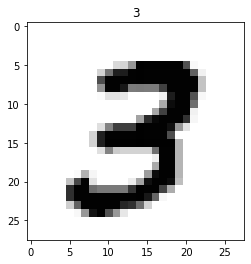

In [ ]:
#Visualize the input data. Change the index value to visualize the particular index data.
index=7;
plt.title((train_labels[index]))
plt.imshow(train_data[index].reshape(28,28), cmap=cm.binary)

In [ ]:
print("train data")
y_value=np.zeros((1,10))
for i in range (10):
    print("occurance of ",i,"=",np.count_nonzero(train_labels==i))
    y_value[0,i-1]= np.count_nonzero(train_labels==i)


train data
occurance of  0 = 5923
occurance of  1 = 6742
occurance of  2 = 5958
occurance of  3 = 6131
occurance of  4 = 5842
occurance of  5 = 5421
occurance of  6 = 5918
occurance of  7 = 6265
occurance of  8 = 5851
occurance of  9 = 5949


<BarContainer object of 10 artists>

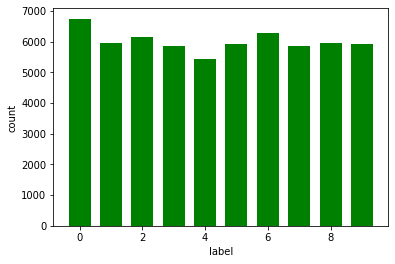

In [ ]:
y_value=y_value.ravel()
x_value=[0,1,2,3,4,5,6,7,8,9]
plt.xlabel('label')
plt.ylabel('count')
plt.bar(x_value,y_value,0.7,color='g')

In [ ]:
#converting train_label in one hot encoder representation 
train_data=np.reshape(train_data,[784,60000])   #
train_label=np.zeros((10,60000))
for col in range (60000):
    val=train_labels[col]
    for row in range (10):
        if (val==row):
            train_label[val,col]=1
print("train_data shape="+str(np.shape(train_data)))
print("train_label shape="+str(np.shape(train_label)))



train_data shape=(784, 60000)
train_label shape=(10, 60000)


<a id='Activation functions'></a>
 ## 2.Activation functions
* Relu
* Softmax
* Sigmoid(not used in this code)

In [ ]:
#activation functions sigmoid relu and softmax
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

def softmax(Z):
    e_x = np.exp(Z)
    A= e_x / np.sum(np.exp(Z))  
    cache=Z
    return A,cache   

<a id='Derivative of activation function'></a>
 ## 3.Derivative of activation function
* These derivative of activation function are used in back propagation.

In [ ]:
#derivative of activation function
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def softmax_backward(Z,cache):
    Z=cache
    length=10  
    dZ=np.zeros((60000,10))
    Z=np.transpose(Z)
    for row in range (0,60000):
            den=(np.sum(np.exp(Z[row,:])))*(np.sum(np.exp(Z[row,:])))
            for col in range (0,10):
                sums=0
                for j in range (0,10):
                    if (j!=col):
                        sums=sums+(math.exp(Z[row,j]))
                
                dZ[row,col]=(math.exp(Z[row,col])*sums)/den           
    dZ=np.transpose(dZ)
    Z=np.transpose(Z)

    assert (dZ.shape == Z.shape)
    return dZ

<a id='Initialization'></a>
 ## 4.Initializaion
* Weights
* Bias

In [ ]:
#initializing the parameters weights and bias
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

<a id='Forward propagation'></a>
 ## 5.Forward propagation
Forward propagation is used to calculate the activated output of particular node. Function linear_forward is used to calculate Z value(z=wa+b). Then it is passed through activation (g(z)) to get the activated output or input for the next layer. The N hidden layers are using 'relu' while the output layer is using 'softmax' to generate out[ut in 10 classes(0 to 9).


In [ ]:
#forward propagation
def linear_forward(A, W, b):
    Z = np.dot(W,A) +b
    cache = (A, W, b)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        #print("Z="+str(Z))
        A, activation_cache = relu(Z) 
    elif activation == "softmax":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "softmax")
    caches.append(cache)               
    return AL, caches

<a id='Cost calculation'></a>
 ## 6.Cost calculation

Cost is calculated usign output of forward propagaion(softmax layer) and train_label. 

In [ ]:
#cost function
def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    #print("cost="+str(cost))
    return cost

<a id='Back propagation'></a>
 ## 7.Back propagation

In [ ]:
#backward propagation
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)  
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True);
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)  
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    M=len(layers_dims)
    current_cache = caches[M-2]
    grads["dA"+str(M-1)], grads["dW"+str(M-1)], grads["db"+str(M-1)] = linear_activation_backward(dAL, current_cache, activation = "softmax")#M-1
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    return grads

<a id='Update parameters'></a>
 ## 8.Update parameters
* Updated Weights    
W=W-(learning_rate* dW)
* Updated Bias     
B=B-(learning_rate* db)

In [ ]:
#upgrade function for weights and bias
def update_parameters(parameters, grads, learning_rate):
    for l in range(len_update-1):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)] - (learning_rate*grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate*grads["db" + str(l+1)])
    return parameters

<a id='.Plot graph of cost'></a>
 ## 9.Plot graph of cost

In [ ]:
def plot_graph(cost_plot):
       
    x_value=list(range(1,len(cost_plot)+1))
    #print(x_value)
    #print(cost_plot)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.plot(x_value,cost_plot,0.,color='g')


<a id='Define architecture'></a>
 ## 10.Define architecture 

Define layers_dim for required architecture of neural nets. First element is the input layer of 28* 28=784 pixel value. Last element is the output layer of 10 classes(0 to 9). Other elements are hidden layer with number of nodes.(Example First hidden layer has 500 nodes, second hiden layer has 400 nodes.....).
Feel free to change the architecture and choose the best optimized one!!

In [ ]:
#defining structure of neural network
layers_dims = [784,500,400,300,100,10] #  n-layer model (n=6 including input and output layer)
len_update=len(layers_dims)

In [ ]:
#function to call sub_functions
def L_layer_model(X, Y, layers_dims, learning_rate , num_iterations , print_cost=False):#lr was 0.009
    print("training...")
    costs = []  
    cost_plot=np.zeros(num_iterations)
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost =compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate) 
        cost_plot[i]=cost;
    
    plot_graph(cost_plot)
    return parameters

training...
training done


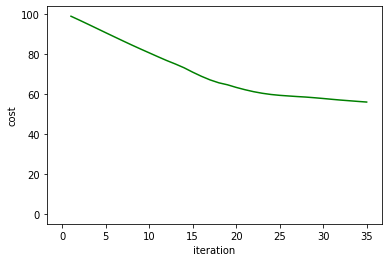

In [ ]:
#variable parameter in network learning_rate, iterationd 
parameters = L_layer_model(train_data, train_label, layers_dims,learning_rate = 0.0005, num_iterations =35 , print_cost = True) 
print("training done")

<a id='Conclusion'></a>
 ## 11.Conclusion 
 This code should be sufficient to understand the working of a simple neural network. Understanding the working of activation function, forward and backward propagation will give the user more flexibility and a better understanding of the concept. Although the efficiency of the code is less as compared to the same problem solved through tensorflow but it gives more insight about the network.
